# Prepare Environment

Load necessary modules and attempt to compile the GrOpt library if it isn't already

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from timeit import default_timer as timer

# This attempts to re-compile the library in case it has been changed, mostly for debug, but won't do anything
# if nothing is changed
import subprocess
out = subprocess.run(["python", "setup.py", "build_ext", "--inplace"], stdout=subprocess.PIPE)
import gropt

from helper_utils_paper import *

%matplotlib inline

# Conventional Monopolar Diffusion Gradients

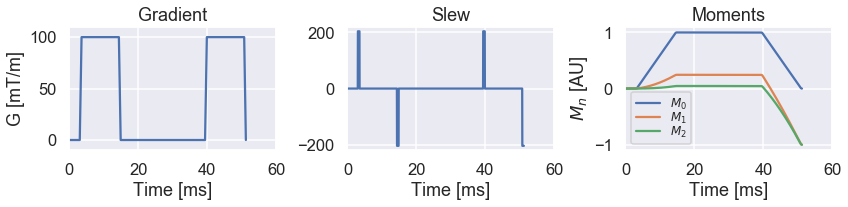

Echo Time = 71.20 ms and Diffusion b-value = 3003 s^2/mm


In [37]:
# Start of parameters to change
params = {}
params['mode'] = 'diff_bval'
params['gmax'] = 100           # Maximum gradient amplitude, mT/m
params['smax'] = 200           # Maximum slew rate, mT/m/ms
params['T_readout'] = 20e-3    # Time from start to center of EPI readout, s
params['T_90'] = 3e-3          # Duration of excitation pulse, s
params['T_180'] = 5e-3         # Duration of refocusing pulse, s
params['b'] = 3050             # Diffusion b-value, s/mm^2
# End of parameters to change

Mono, TE, b = monopolar_diffusion(params)
params['TE'] = TE/100
bval, axarr = plot_waveform_new(Mono, params, plot_moments = True, plot_eddy = False, plot_pns = False, plot_slew = True, plot_maxwell = False)
plt.legend(('$M_{0}$', '$M_{1}$', '$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=3)
plt.ylim((-1.1, 1.1))
axarr[0,0].set_ylim(-10,110)
axarr[0,1].set_ylim(-220,220)
axarr[0,2].set_ylim(-1.1,1.1)
axarr[0,0].set_xlim(-0.1,60)
axarr[0,1].set_xlim(-0.1,60)
axarr[0,2].set_xlim(-0.1,60)
plt.show(plot_waveform_new)
TE = params['TE']+params['T_readout']*1e3
print('Echo Time = %.2f ms and Diffusion b-value = %.f s^2/mm' % (TE, bval))


# Optimized Monopolar Diffusion Gradients

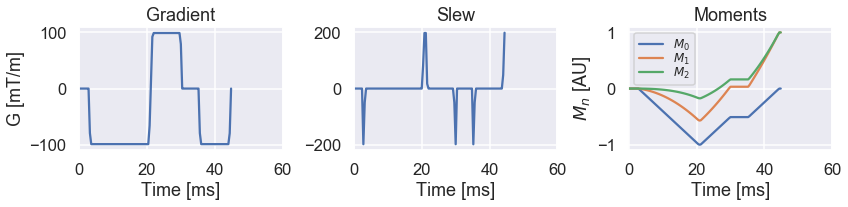

Echo Time = 65.03 ms and Diffusion b-value = 3052 s^2/mm


In [38]:
# Start of parameters to change
params = {}
params['mode'] = 'diff_bval'
params['gmax'] = 100/1000      # Maximum gradient amplitude, T/m
params['smax'] = 200           # Maximum slew rate, mT/m/ms
params['MMT'] = 0              # Desired moment nulling (0 = M0, 1 = M0 and M1, 2 = M0, M1 and M2)
params['T_readout'] = 20       # Time from start to center of EPI readout, ms
params['T_90'] = 3             # Duration of excitation pulse, ms
params['T_180'] = 5            # Duration of refocusing pulse, ms
params['dt'] = 400e-6          # Sampling rate, ms
params['b'] = 3000             # Diffusion b-value, s/mm^2
min_TE = 10                    # Minimum TE search range, ms
max_TE = 150                   # Maximum TE search range, ms
# End of parameters to change

G, TE = get_min_TE_diff(params, params['b'], min_TE, max_TE, verbose=0)
bval, axarr = plot_waveform_new(G, params, plot_moments = True, plot_eddy = False, plot_pns = False, plot_slew = True, plot_maxwell = False)
plt.legend(('$M_{0}$', '$M_{1}$', '$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=0)
axarr[0,0].set_ylim(-110,110)
axarr[0,1].set_ylim(-220,220)
axarr[0,2].set_ylim(-1.1,1.1)
axarr[0,0].set_xlim(-0.1,60)
axarr[0,1].set_xlim(-0.1,60)
axarr[0,2].set_xlim(-0.1,60)
plt.show(plot_waveform_new)
print('Echo Time = %.2f ms and Diffusion b-value = %.f s^2/mm' % (TE, bval))


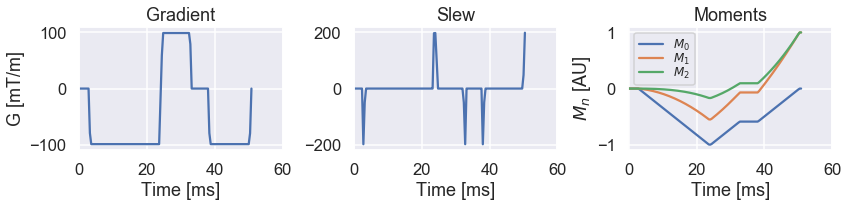

Echo Time = 71.20 ms and Diffusion b-value = 4919 s^2/mm


In [39]:
# Start of parameters to change
params = {}
params['mode'] = 'diff_bval'
params['gmax'] = 100/1000      # Maximum gradient amplitude, T/m
params['smax'] = 200           # Maximum slew rate, mT/m/ms
params['MMT'] = 0              # Desired moment nulling (0 = M0, 1 = M0 and M1, 2 = M0, M1 and M2)
params['T_readout'] = 20       # Time from start to center of EPI readout, ms
params['T_90'] = 3             # Duration of excitation pulse, ms
params['T_180'] = 5            # Duration of refocusing pulse, ms
params['dt'] = 400e-6          # Sampling rate, ms
params['TE'] = 71.2            # Echo time, ms (chosen to match Monopolar)
# End of parameters to change

G, dd  = gropt.gropt(params, verbose=0)
bval, axarr = plot_waveform_new(G, params, plot_moments = True, plot_eddy = False, plot_pns = False, plot_slew = True, plot_maxwell = False)
plt.legend(('$M_{0}$', '$M_{1}$', '$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=0)
axarr[0,0].set_ylim(-110,110)
axarr[0,1].set_ylim(-220,220)
axarr[0,2].set_ylim(-1.1,1.1)
axarr[0,0].set_xlim(-0.1,60)
axarr[0,1].set_xlim(-0.1,60)
axarr[0,2].set_xlim(-0.1,60)
plt.show(plot_waveform_new)
print('Echo Time = %.2f ms and Diffusion b-value = %.f s^2/mm' % (params['TE'], bval))
